In [2]:
import numpy as np
from scipy.stats import norm, expon, chi2, uniform
import matplotlib.pyplot as plt
%matplotlib inline

# Standard distributions sampling
## Ex 1.
Use scipy to take samples from the following distributions:
1. Normal distribution with $\mu$=1 and $\sigma$=4,
2. Exponential distribution with $\lambda = \dfrac{1}{4}$,
3. Chi-squared distribution with 8 degrees of freedom,
4. Uniform distribution with borders [$-2\sqrt{3}, 6\sqrt{3}$].

Compare their theoretical and sample distribution, mean and variance.

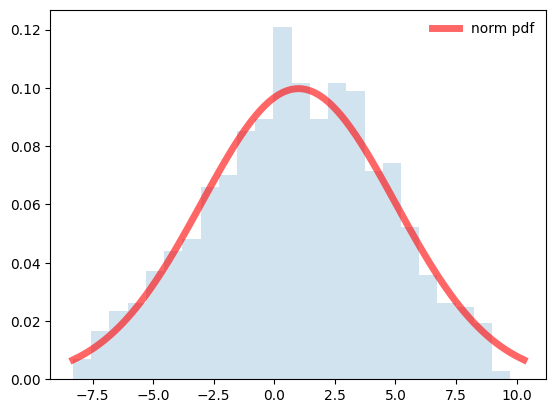

Normal distribution
Distribution mean: 1.0
Distribution variance: 16.0
Sample mean: 0.9523763129095543
Sample variance: 16.19547672273603


In [11]:
#1. Normal
#This one I'll do for you :-)

rv_norm = norm(loc = 1, scale = 4)
x = np.linspace(rv_norm.ppf(0.01), rv_norm.ppf(0.99), 100)
fig, ax = plt.subplots(1, 1)
ax.plot(x, rv_norm.pdf(x), 'r-', lw=5, alpha=0.6, label='norm pdf')
r = rv_norm.rvs(size=1000)
ax.hist(r, density=True, histtype='stepfilled', alpha=0.2, bins = x[::4])


ax.legend(loc='best', frameon=False)
plt.show()

print("Normal distribution")
print("Distribution mean: {0}".format(rv_norm.stats(moments='m')))
print("Distribution variance: {0}".format(rv_norm.stats(moments='v')))
print("Sample mean: {0}".format(np.mean(r)))
print("Sample variance: {0}".format(np.var(r)))

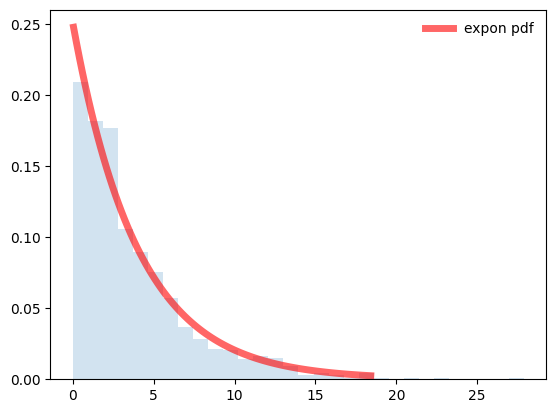

Exponential Distribution
Distribution mean: 4.0
Distribution variance: 16.0
Sample mean: 3.784090608556068
Sample variance: 13.064490063617763


In [13]:
#Exponential

rv_expon = expon(scale=4)
x_expon = np.linspace(rv_expon.ppf(0.01), rv_expon.ppf(0.99), 100)
fig, ax = plt.subplots(1, 1)
ax.plot(x_expon, rv_expon.pdf(x_expon), 'r-', lw=5, alpha=0.6, label='expon pdf')
r_expon = rv_expon.rvs(size=1000)
ax.hist(r_expon, density=True, histtype='stepfilled', alpha=0.2, bins=30)

ax.legend(loc='best', frameon=False)
plt.show()

print("Exponential Distribution")
print("Distribution mean: {0}".format(rv_expon.stats(moments='m')))
print("Distribution variance: {0}".format(rv_expon.stats(moments='v')))
print("Sample mean: {0}".format(np.mean(r_expon)))
print("Sample variance: {0}".format(np.var(r_expon)))

#hint: expon

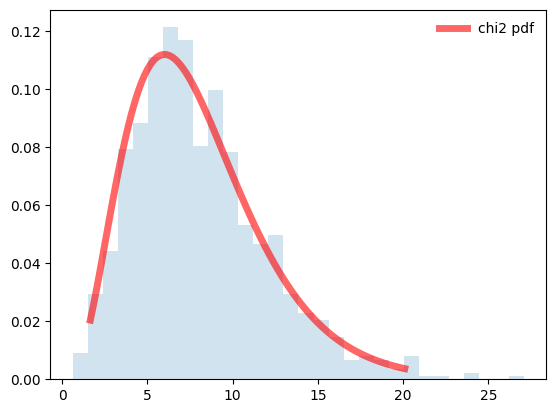

Chi-Squared Distribution
Distribution mean: 8.0
Distribution variance: 16.0
Sample mean: 8.119507482944947
Sample variance: 15.55827825144864


In [14]:
#chi2

rv_chi2 = chi2(df=8)
x_chi2 = np.linspace(rv_chi2.ppf(0.01), rv_chi2.ppf(0.99), 100)
fig, ax = plt.subplots(1, 1)
ax.plot(x_chi2, rv_chi2.pdf(x_chi2), 'r-', lw=5, alpha=0.6, label='chi2 pdf')
r_chi2 = rv_chi2.rvs(size=1000)  
ax.hist(r_chi2, density=True, histtype='stepfilled', alpha=0.2, bins=30)

ax.legend(loc='best', frameon=False)
plt.show()

print("Chi-Squared Distribution")
print("Distribution mean: {0}".format(rv_chi2.stats(moments='m')))
print("Distribution variance: {0}".format(rv_chi2.stats(moments='v')))
print("Sample mean: {0}".format(np.mean(r_chi2)))
print("Sample variance: {0}".format(np.var(r_chi2)))




#hint: chi2

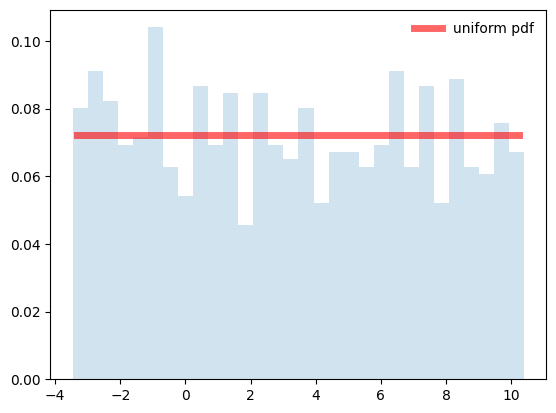

Uniform Distribution
Distribution mean: 3.4641016151377544
Distribution variance: 15.999999999999998
Sample mean: 3.288833649248159
Sample variance: 16.48479135333994


In [15]:
#uniform

a = -2 * np.sqrt(3)
b = 6 * np.sqrt(3)
rv_uniform = uniform(loc=a, scale=(b - a))
x_uniform = np.linspace(rv_uniform.ppf(0.01), rv_uniform.ppf(0.99), 100)
fig, ax = plt.subplots(1, 1)
ax.plot(x_uniform, rv_uniform.pdf(x_uniform), 'r-', lw=5, alpha=0.6, label='uniform pdf')
r_uniform = rv_uniform.rvs(size=1000)
ax.hist(r_uniform, density=True, histtype='stepfilled', alpha=0.2, bins=30)

ax.legend(loc='best', frameon=False)
plt.show()

print("Uniform Distribution")
print("Distribution mean: {0}".format(rv_uniform.stats(moments='m')))
print("Distribution variance: {0}".format(rv_uniform.stats(moments='v')))
print("Sample mean: {0}".format(np.mean(r_uniform)))
print("Sample variance: {0}".format(np.var(r_uniform)))


#hint: uniform

# Low of large numbers. Central Limit Theorem.
## Ex 2.
a) For N from 2 to 1000 draw N samples from distributions defined in Ex 1. Plot sample variance and mean against the size of the sample. 

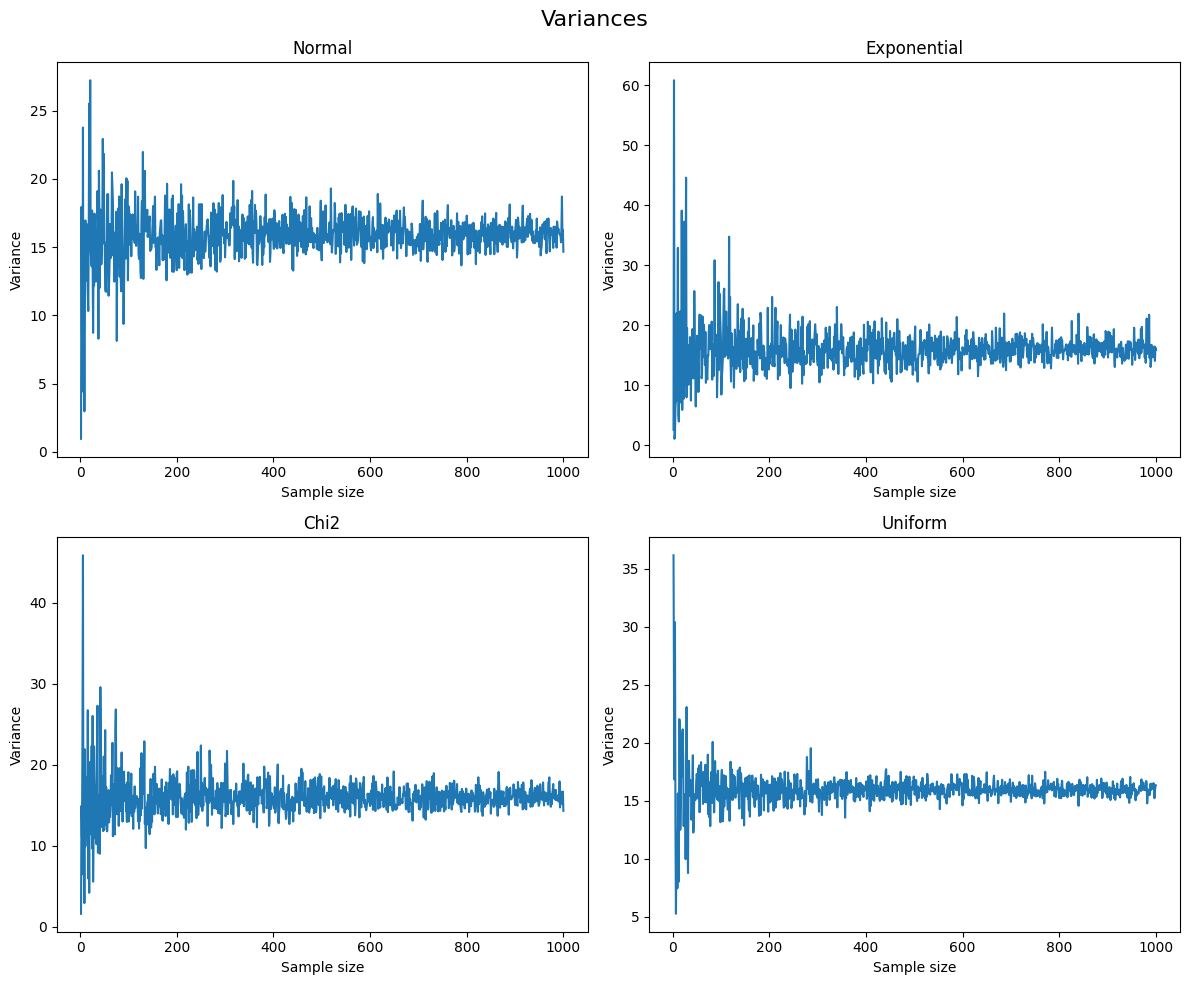

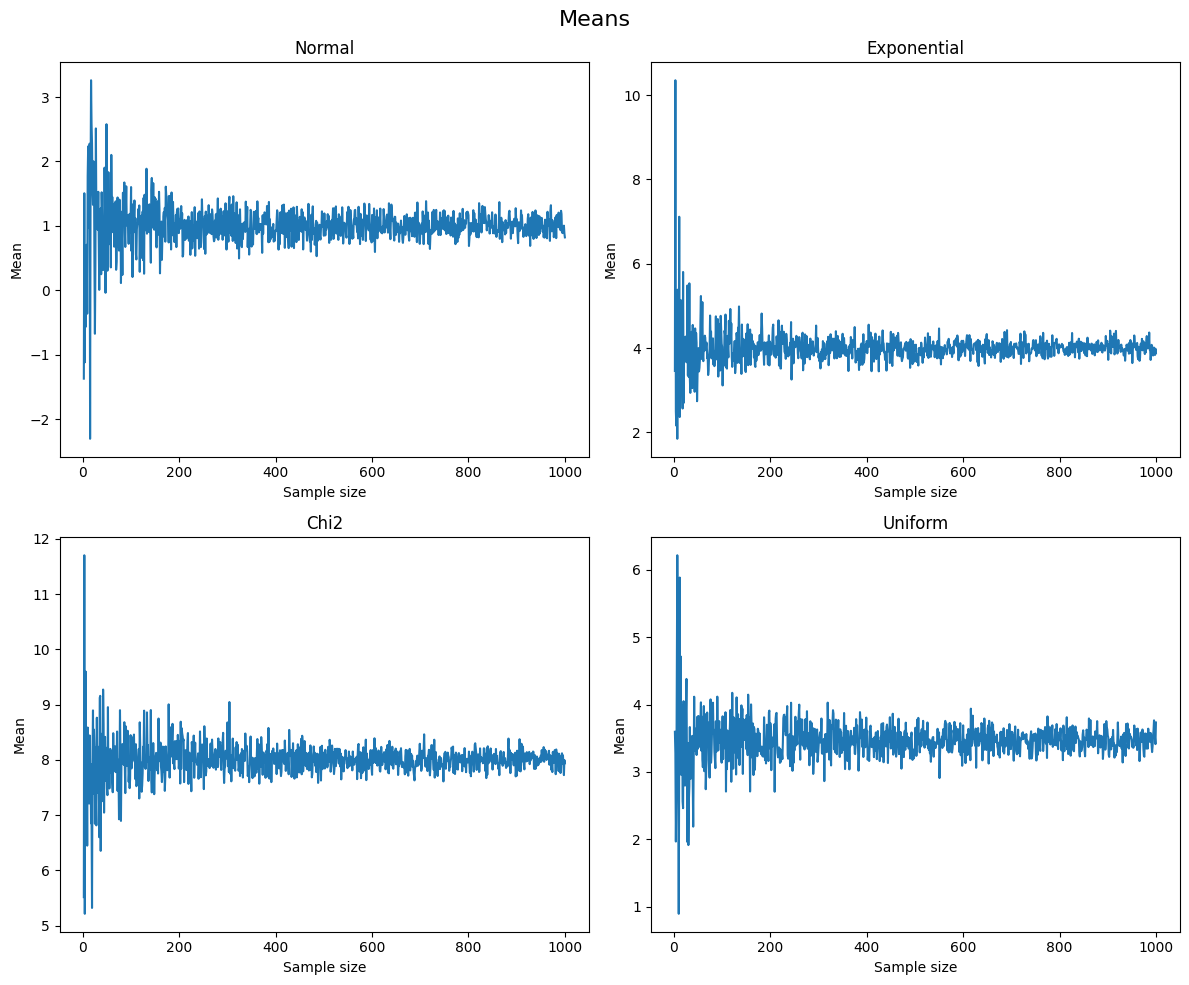

In [16]:
#here goes your code

# params for distribution
rv_normal = norm(loc=1, scale=4)
rv_expon = expon(scale=4)
rv_chi2 = chi2(df=8)
rv_uniform = uniform(loc=a, scale=(b - a))

# Function to calculate running means and variances
def running_statistics(dist, size=1000):
    means = []
    variances = []
    for N in range(2, size + 1):
        samples = dist.rvs(size=N)
        means.append(np.mean(samples))
        variances.append(np.var(samples))
    return means, variances

# Generate data for each distribution
normal_means, normal_variances = running_statistics(rv_normal)
expon_means, expon_variances = running_statistics(rv_expon)
chi2_means, chi2_variances = running_statistics(rv_chi2)
uniform_means, uniform_variances = running_statistics(rv_uniform)

# Plot the results
fig, axs = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle("Variances", fontsize=16)

axs[0, 0].plot(range(2, 1001), normal_variances)
axs[0, 0].set_title("Normal")
axs[0, 0].set_xlabel("Sample size")
axs[0, 0].set_ylabel("Variance")

axs[0, 1].plot(range(2, 1001), expon_variances)
axs[0, 1].set_title("Exponential")
axs[0, 1].set_xlabel("Sample size")
axs[0, 1].set_ylabel("Variance")

axs[1, 0].plot(range(2, 1001), chi2_variances)
axs[1, 0].set_title("Chi2")
axs[1, 0].set_xlabel("Sample size")
axs[1, 0].set_ylabel("Variance")

axs[1, 1].plot(range(2, 1001), uniform_variances)
axs[1, 1].set_title("Uniform")
axs[1, 1].set_xlabel("Sample size")
axs[1, 1].set_ylabel("Variance")

plt.tight_layout()
plt.show()

fig, axs = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle("Means", fontsize=16)

axs[0, 0].plot(range(2, 1001), normal_means)
axs[0, 0].set_title("Normal")
axs[0, 0].set_xlabel("Sample size")
axs[0, 0].set_ylabel("Mean")

axs[0, 1].plot(range(2, 1001), expon_means)
axs[0, 1].set_title("Exponential")
axs[0, 1].set_xlabel("Sample size")
axs[0, 1].set_ylabel("Mean")

axs[1, 0].plot(range(2, 1001), chi2_means)
axs[1, 0].set_title("Chi2")
axs[1, 0].set_xlabel("Sample size")
axs[1, 0].set_ylabel("Mean")

axs[1, 1].plot(range(2, 1001), uniform_means)
axs[1, 1].set_title("Uniform")
axs[1, 1].set_xlabel("Sample size")
axs[1, 1].set_ylabel("Mean")

plt.tight_layout()
plt.show()


## Ex 3.
For N=1,4,9,16 draw histograms of an average over N samples taken from distributions defined in Ex 1. 

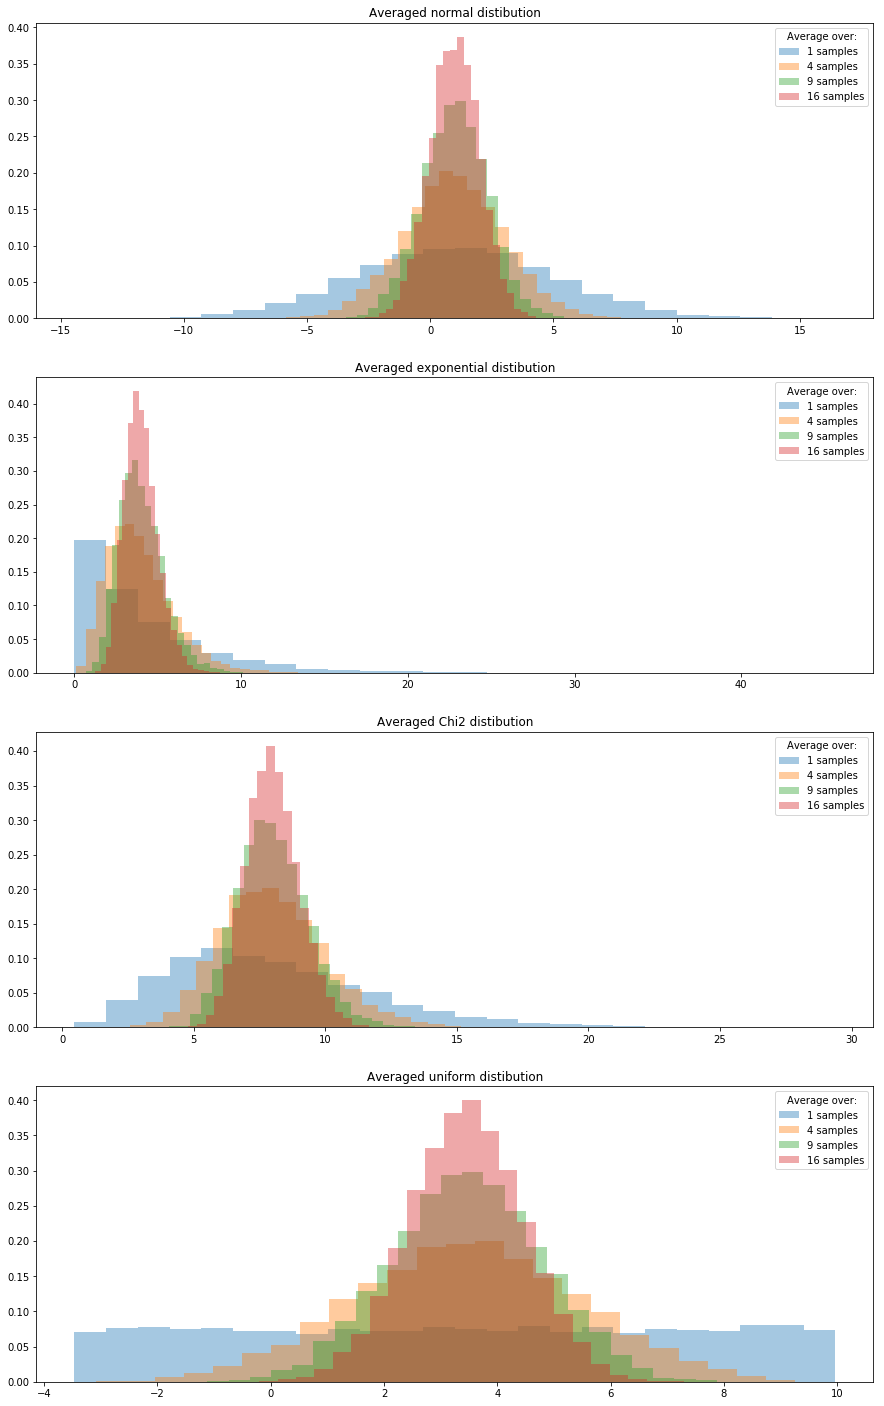

In [18]:
#here goes your code


# Arbitrary distribution sampling

Sometimes it may happen, that we need to sample from a custom distribution, not implemented in any standard library. There exist a simple algorithm for such sampling, provided that the distribution is bounded (pdf has finite support and maximum).


#### Accept-rejection sampling
Let the distribution be given by the pdf $g(x)$ and defined at interval $[a,b]$. In addition, let $M$ be the supremum of $g(x)$.

1. Take a sample $t$ from the uniform distribution at the interval $[a,b]$,
2. Take a sample $u$ from the uniform distribution at the interval $[0,M]$,
3. If $g(t) > u$ we accept $t$ as a sample taken from the original distribution. If not, we go back to 1.

## Ex 4. 
Implement function accept_rejection_sampling(dist, size = 1) which samples from any bounded distribution on the [0,1] interval.

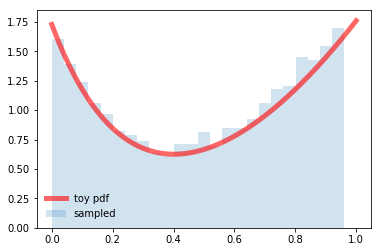

In [8]:
def toy_dist(x):
    C = 1/3 - np.exp(-4)/4 + 1/4
    return (x**2 + np.exp(-4*x)) / C 

x = np.linspace(0,1,1000)

def accept_rejection_sampling(dist, size = 1):
    #here goes your code



samples = accept_rejection_sampling(toy_dist(x), size = 10000)

fig, ax = plt.subplots(1, 1)
ax.plot(x, toy_dist(x), 'r-', lw=5, alpha=0.6, label='toy pdf')
ax.hist(samples, density=True, histtype='stepfilled', alpha=0.2, bins = x[::40], label = "sampled")
ax.legend(loc='best', frameon=False)
plt.show()

# Probability space matters!
## Ex 5
Sample 2000 points from the unit disk. Do it in following ways:
1. Assume uniform distribution of radius (0,1) and argument (0,2$\pi$),  
2. Assume uniform distribution of x and y coordinate (-1,1). Drop values laying outside of the disk.   
Explain differences. between 1. and 2. Then:
3. Modify the solution of point 1. by changing the distribution of the radius in such a way, that we result in 2D distribution from 2.

Version 1


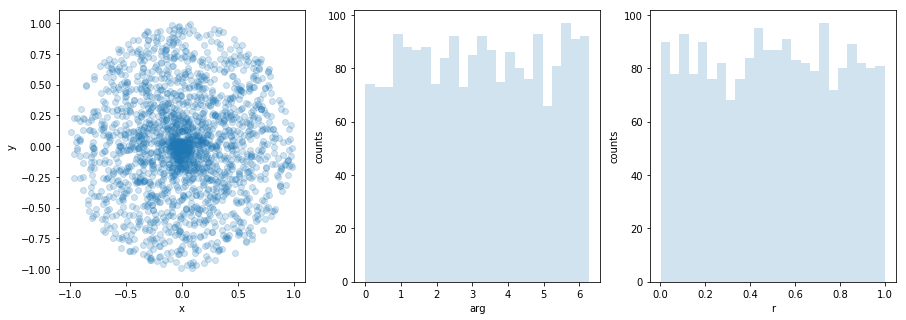

Version 2


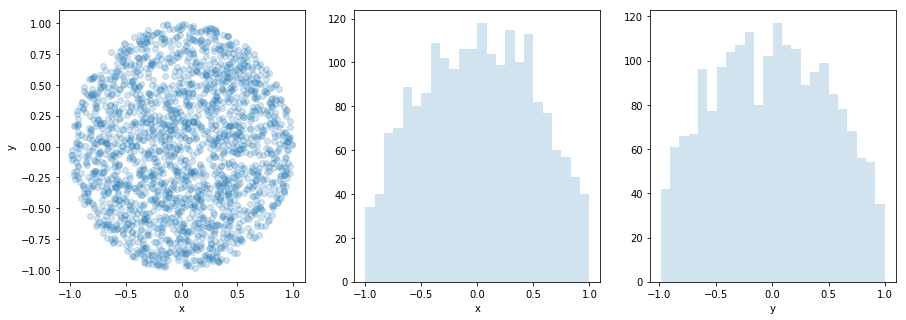

In [9]:
#Version1
#here goes your code


#Version2
#here goes your code

Here goes your explanation




Version 3


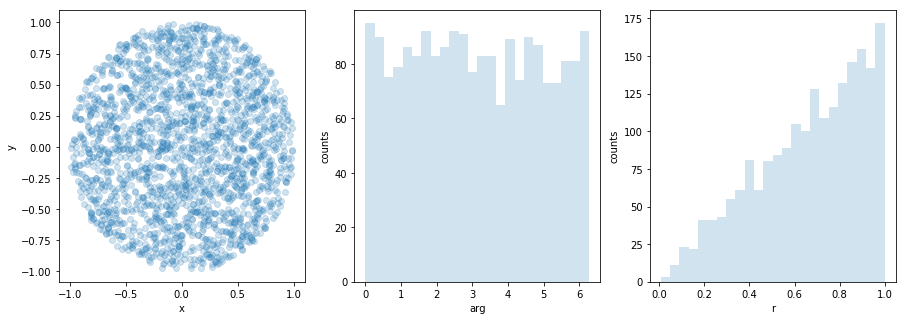

In [10]:
#Version3
#here goes your code


## Application: Laplace equation, Dirichlet boundary conditions

#### Monte-Carlo procedure for solving 2D Laplace equation with Dirichlet boundary conditions
1. Start in a random position inside the boundaries,
2. With an equal probability move up/down/right/left until you hit the boundary,
3. After hitting the boundary we take the value $v_{b}$ of the function in the hitting point. We update the values of all points along the just finished random walk using the formula:
$$ v_{new} = \dfrac{nv_{old} + v_{b}}{n+1}, $$
where $n$ is a number of random walks which have already passed through this point.
4. Finish if the desired precision is achieved. If not, go back to 1.


A theory behind the above procedure can be found here:
https://www.uzh.ch/cmsssl/physik/dam/jcr:d559688c-1e7f-44ca-9fbe-aab0755c0b6e/empp18_MC_Markov.pdf

## Ex 6
Implement the method described above and solve numerically given Dirichlet problem. Plot few intermediate steps.

In [11]:
S = 100 # Decrease if computations take too long
plane = np.zeros((S,S))
plane_counts = np.zeros((S,S))
plane[0] = np.cos(np.linspace(-1.5,1.5,S)*2*np.pi)
plane[-1] = -np.cos(np.linspace(-1,1,S)*2*np.pi)
plane[:,0] = np.cos(np.linspace(-0.5,0.5,S)*2*np.pi)
plane[:,-1] = -2+np.linspace(-1,1,S)**2

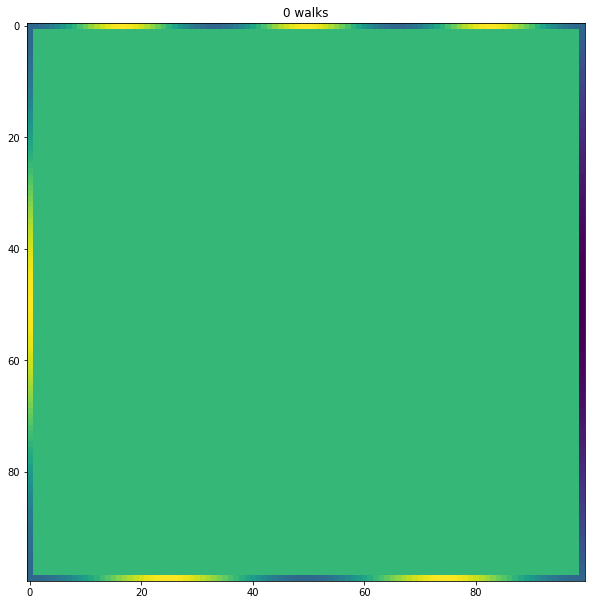

In [12]:
plt.figure(figsize=(10,15))
plt.title("0 walks")
plt.imshow(plane)

In [13]:
#here goes your code

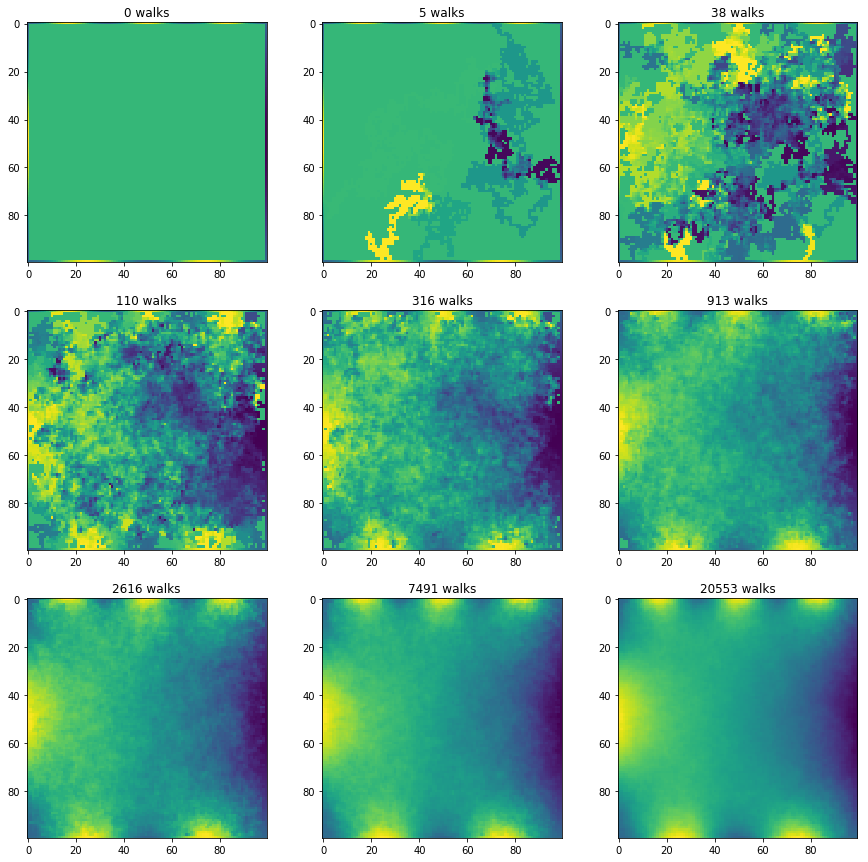

In [16]:
#Animation code for testing purposes. May not work on your machine.


%matplotlib qt

import matplotlib.animation as animation 

fig = plt.figure()
plt.title("0 walks")
im = plt.imshow(planes[0])
im.set_array(planes[0])

# function to update figure
def updatefig(j):
    # set the data in the axesimage object
    im.set_array(planes[j])
    plt.title("{0} walks".format(walks[j]))
    return [im]
# kick off the animation
ani = animation.FuncAnimation(fig, updatefig, frames=range(1000), interval=1000)
plt.show()